# 데이터셋 API
- 데이터 입력 파이프라인을 위한 패키지
- tf.data 패키지에서 제공
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스 객체를 사용 또는 만들어 쓴다.

## 데이터 입력 파이프라인이란
**모델에 공급**되는 데이터에 대한 전처리 작업과 공급을 담당한다.    
- 이미지 데이터의 경우
    - 분산 파일시스템으로 부터 이미지를 모으는 작업, 
    - 이미지에 노이즈를 주거나 변형하는 작업, 
    - 배치 학습을 위해 무작위로 데이터를 선택하여 배치데이터를 만드는 작업
- 텍스트 데이터 경우
    - 원문을 토큰화하는 작업
    - 임베딩하는 작업
    - 길이가 다른 데이터를 패딩하여 합치는 작업 


## 데이터셋 API 사용 세단계
1. 데이터셋 생성
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스를 사용해 메모리나 파일에 있는 데이터를 데이터소스로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. 데이터셋 변형: map(), filter(), batch() 등 메소드를 이용해 데이터 소스를 변형한다.
3. for 반복문에서 iterate를 통해 데이터셋 사용

## Dataset의 주요 메소드
- map(함수) : dataset의 각 원소들을 함수로 처리한다.
- shuffle(크기): dataset의 원소들의 순서를 섞는다. 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.=>데이터가 너무너무 많으면 적게 주기도 한다.)
- batch(size) : 반복시 제공할 데이터 수. 지정한 batch size만큼 data를 꺼내준다.

In [1]:
import tensorflow as tf
import numpy as np

In [15]:
arr = np.arange(9)

In [16]:
# 메모리에 ndarray로 저장된 데이터를 이용해 Dataset 객체 생성
dataset = tf.data.Dataset.from_tensor_slices(arr)
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [17]:
# 각각의 원소를 변환하는 작업을 Dataset에 추가 - Dataset.map(변환함수)
dataset = dataset.map(lambda x:x**2)
type(dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [9]:
# dataset = dataset.filter(lambda x: x%2 == 0)  #2의 배수만 걸러내기
# def func(x):
#     return x%2 == 0

In [18]:
dataset = dataset.shuffle(9)

In [19]:
dataset = dataset.batch(3)  #한번에 지정한 개수(3)만큼 제공

In [20]:
# Dataset에서 제공되는 값들을 조회
for a in dataset:
    print(a)

tf.Tensor([36 16  0], shape=(3,), dtype=int32)
tf.Tensor([ 1 64  9], shape=(3,), dtype=int32)
tf.Tensor([25 49  4], shape=(3,), dtype=int32)


In [21]:
x = np.arange(10)
y = np.arange(10, 20)
x.shape, y.shape

((10,), (10,))

In [22]:
ds = tf.data.Dataset.from_tensor_slices((x, y))

In [24]:
for a in ds:
    print(a)
    break

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)


In [25]:
ds2 = ds.map(lambda x, y: (x**2, y**3))
# def map_func(x, y):
#     return (x**2, y**3)

In [26]:
for a in ds2:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)


In [27]:
ds3 = ds2.shuffle(10)

In [28]:
for a in ds3:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)


In [29]:
ds4 = ds2.batch(4)

In [30]:
for a in ds4:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)


In [31]:
for a in ds4.repeat():
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, n

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, n

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, n

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, n

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, n

KeyboardInterrupt: 

In [33]:
dataset = tf.data.Dataset.from_tensor_slices((x, y)).map(lambda x, y: (x**2, y**3)).shuffle(10).batch(4).repeat(3)

In [34]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 36, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 4096, 2744, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 25,  9,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 3375, 2197, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  0, 25,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 1000, 3375, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  9, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2197, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  4, 16, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 1728, 2744, 5832])>)
(<tf.Tensor

# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [36]:
# random seed
np.random.seed(1)
tf.random.set_seed(1)

In [39]:
# 데이터셋 로딩
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [40]:
y_train[:5]  #회구(Regression)

array([15.2, 42.3, 50. , 21.1, 17.7])

In [41]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [46]:
# 하이퍼파라미터 값들을 설정
LEARNING_RATE = 0.001  #학습률
N_EPOCHS = 200  #에폭 횟수. 1 epoch: 전체 데이터셋을 한번 사용한 것
N_BATCHS = 32  #batch size. 32개 데이터셋마다 파라미터를(가중치) 업데이트

N_TRAIN = X_train.shape[0]  #train set의 개수
N_TEST = X_test.shape[0]  #test set의 개수
N_FEATURES = X_train.shape[1]  #input data의 feature(컬럼) 개수

In [47]:
# Dataset 생성
# drop_remainder=True : 마지막에 batch size보다 제공할 데이터가 적으면 학습시 제공하지 말고 버려라
# repeat() : 여러 epoch을 돌 때마다 계속 데이터를 제공하게 하기 위해서. repeat를 지정하지 않으면 1 epoch 후 제공할 데이터가 없어짐
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [54]:
# 모델 생성
def create_model():
    model = keras.Sequential()
    #입력 Layer를 따로 정의
    #첫번째 layer를 만들 때 input_shape(입력 데이터의 형태)를 지정하면 입력 layer층이 자동으로 생성
    model.add(keras.layers.Dense(units=16, activation='relu', input_shape=(N_FEATURES, )))
    model.add(keras.layers.Dense(units=8, activation='relu'))
    #출력 layer
    model.add(keras.layers.Dense(units=1))  #회귀의 출력층: units수는 1, activation 함수는 사용하지 않는다
    
    #모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),  #optimizer의 하이퍼파라미터를 기본값으로 쓸 경우 문자열로 'adam' 선언하면 됨
                 loss='mse')  #회귀의 loss 함수: mse
    return model

In [55]:
model = create_model()

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [71]:
step_per_epoch = N_TRAIN // N_BATCHS

In [63]:
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

In [72]:
history = model.fit(train_dataset, #train dataset(X_train, y_train)
          epochs=N_EPOCHS,
          steps_per_epoch= step_per_epoch,  #1 epoch당 step 수
          validation_data=val_dataset,
          validation_steps=validation_steps)

Train for 12 steps, validate for 4 steps
Epoch 1/200
12/12 [==============================] - 0s 4ms/step - loss: 14.3241 - val_loss: 45.3671
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 14.1968 - val_loss: 49.1909
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 15.5258 - val_loss: 50.8458
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 15.4664 - val_loss: 45.5333
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 14.1860 - val_loss: 44.1797
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 13.9120 - val_loss: 44.6137
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 14.7960 - val_loss: 47.2104
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 14.7715 - val_loss: 47.3294
Epoch 9/200
12/12 [==============================] - 0s 4ms/step - loss: 14.4234 - val_loss: 44.8318
Epoch 10/200
12/12 [==============================

12/12 [==============================] - 0s 4ms/step - loss: 12.6382 - val_loss: 57.2274
Epoch 82/200
12/12 [==============================] - 0s 4ms/step - loss: 12.4619 - val_loss: 46.8908
Epoch 83/200
12/12 [==============================] - 0s 4ms/step - loss: 12.7742 - val_loss: 45.9876
Epoch 84/200
12/12 [==============================] - 0s 4ms/step - loss: 11.9474 - val_loss: 45.9544
Epoch 85/200
12/12 [==============================] - 0s 4ms/step - loss: 12.5371 - val_loss: 50.4713
Epoch 86/200
12/12 [==============================] - 0s 4ms/step - loss: 13.6055 - val_loss: 57.9421
Epoch 87/200
12/12 [==============================] - 0s 4ms/step - loss: 14.5749 - val_loss: 56.9694
Epoch 88/200
12/12 [==============================] - 0s 4ms/step - loss: 13.3767 - val_loss: 49.3016
Epoch 89/200
12/12 [==============================] - 0s 4ms/step - loss: 12.7430 - val_loss: 53.2236
Epoch 90/200
12/12 [==============================] - 0s 3ms/step - loss: 12.7872 - val_loss: 4

Epoch 161/200
12/12 [==============================] - 0s 3ms/step - loss: 13.9155 - val_loss: 59.6025
Epoch 162/200
12/12 [==============================] - 0s 3ms/step - loss: 14.8395 - val_loss: 43.1156
Epoch 163/200
12/12 [==============================] - 0s 3ms/step - loss: 13.6860 - val_loss: 49.7783
Epoch 164/200
12/12 [==============================] - 0s 3ms/step - loss: 13.5364 - val_loss: 45.6752
Epoch 165/200
12/12 [==============================] - 0s 3ms/step - loss: 12.2240 - val_loss: 46.8093
Epoch 166/200
12/12 [==============================] - 0s 3ms/step - loss: 13.4277 - val_loss: 45.2866
Epoch 167/200
12/12 [==============================] - 0s 3ms/step - loss: 12.5666 - val_loss: 48.4866
Epoch 168/200
12/12 [==============================] - 0s 3ms/step - loss: 12.6724 - val_loss: 47.0885
Epoch 169/200
12/12 [==============================] - 0s 3ms/step - loss: 11.8541 - val_loss: 45.6961
Epoch 170/200
12/12 [==============================] - 0s 3ms/step - loss

In [73]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [74]:
history.history

{'loss': [14.32405432065328,
  14.196779330571493,
  15.525782028834024,
  15.466371297836304,
  14.18601361910502,
  13.912047028541565,
  14.795998096466064,
  14.771526098251343,
  14.42341685295105,
  14.758086919784546,
  14.663167079289755,
  13.947800079981485,
  13.606842517852783,
  13.676199038823446,
  16.02086865901947,
  13.81303302447001,
  15.643717924753824,
  14.136367162068685,
  12.823057293891907,
  14.854858636856079,
  14.193270842234293,
  13.685014804204306,
  15.052025079727173,
  15.068335930506388,
  14.109200159708658,
  13.634239594141642,
  13.791018962860107,
  14.448894818623861,
  13.303329467773438,
  13.022743940353394,
  12.839128812154135,
  14.079935987790426,
  13.795697371164957,
  13.711797634760538,
  13.825527747472128,
  15.324659506479898,
  15.282171249389648,
  12.954395691553751,
  13.422847747802734,
  13.721095522244772,
  13.17557986577352,
  13.04171327749888,
  13.355030298233032,
  13.57684620221456,
  13.574404199918112,
  13.75331

In [75]:
history.history['val_loss']

[45.367063760757446,
 49.19091200828552,
 50.84576940536499,
 45.53326749801636,
 44.1796932220459,
 44.613739013671875,
 47.210429668426514,
 47.32943773269653,
 44.831841468811035,
 42.30853891372681,
 43.520647048950195,
 50.73686456680298,
 44.22724461555481,
 43.329962730407715,
 45.383400201797485,
 48.77766251564026,
 53.284159660339355,
 43.99311542510986,
 45.04876136779785,
 43.60511350631714,
 47.39992570877075,
 51.389134645462036,
 59.875221252441406,
 52.18127775192261,
 48.711002349853516,
 47.49691152572632,
 45.09363031387329,
 43.27131462097168,
 46.40237092971802,
 49.54576659202576,
 55.33398389816284,
 51.45487356185913,
 42.133904218673706,
 45.62391519546509,
 48.56639575958252,
 62.11138868331909,
 60.038267612457275,
 46.85670709609985,
 48.02643847465515,
 47.20324420928955,
 47.09815239906311,
 45.86944913864136,
 46.36598563194275,
 49.82046461105347,
 44.102092266082764,
 44.45387363433838,
 44.562273025512695,
 54.28200650215149,
 51.88988280296326,
 45.00

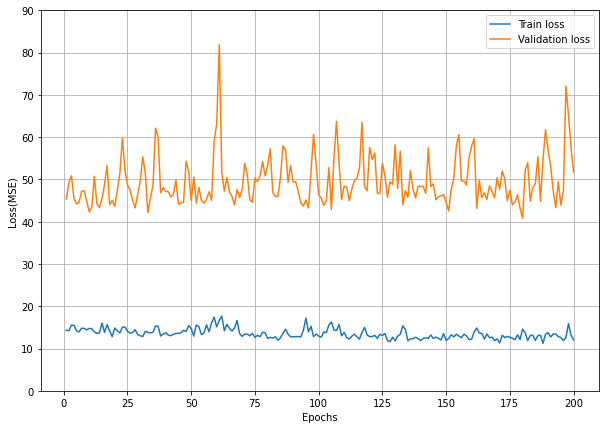

In [77]:
#epoch당 loss와 val_loss 변화에 대해 선그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='Train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.ylim(0, 90)
plt.legend()
plt.grid(True)
plt.show()

## 2. Classification

### Fashion MNIST(MNIST) Dataset

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']